In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [15]:
working_dir = "/".join(os.getcwd().split("/")[:-1])
DATASETS_PATH = os.path.join(working_dir, "datasets")
RAW_DATASET_PATH = os.path.join(DATASETS_PATH, "raw")
RAW_DATASET = os.path.join(RAW_DATASET_PATH, "data.csv")

In [16]:
df = pd.read_csv(RAW_DATASET, sep=";")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [18]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [19]:
df.dropna(inplace=True)

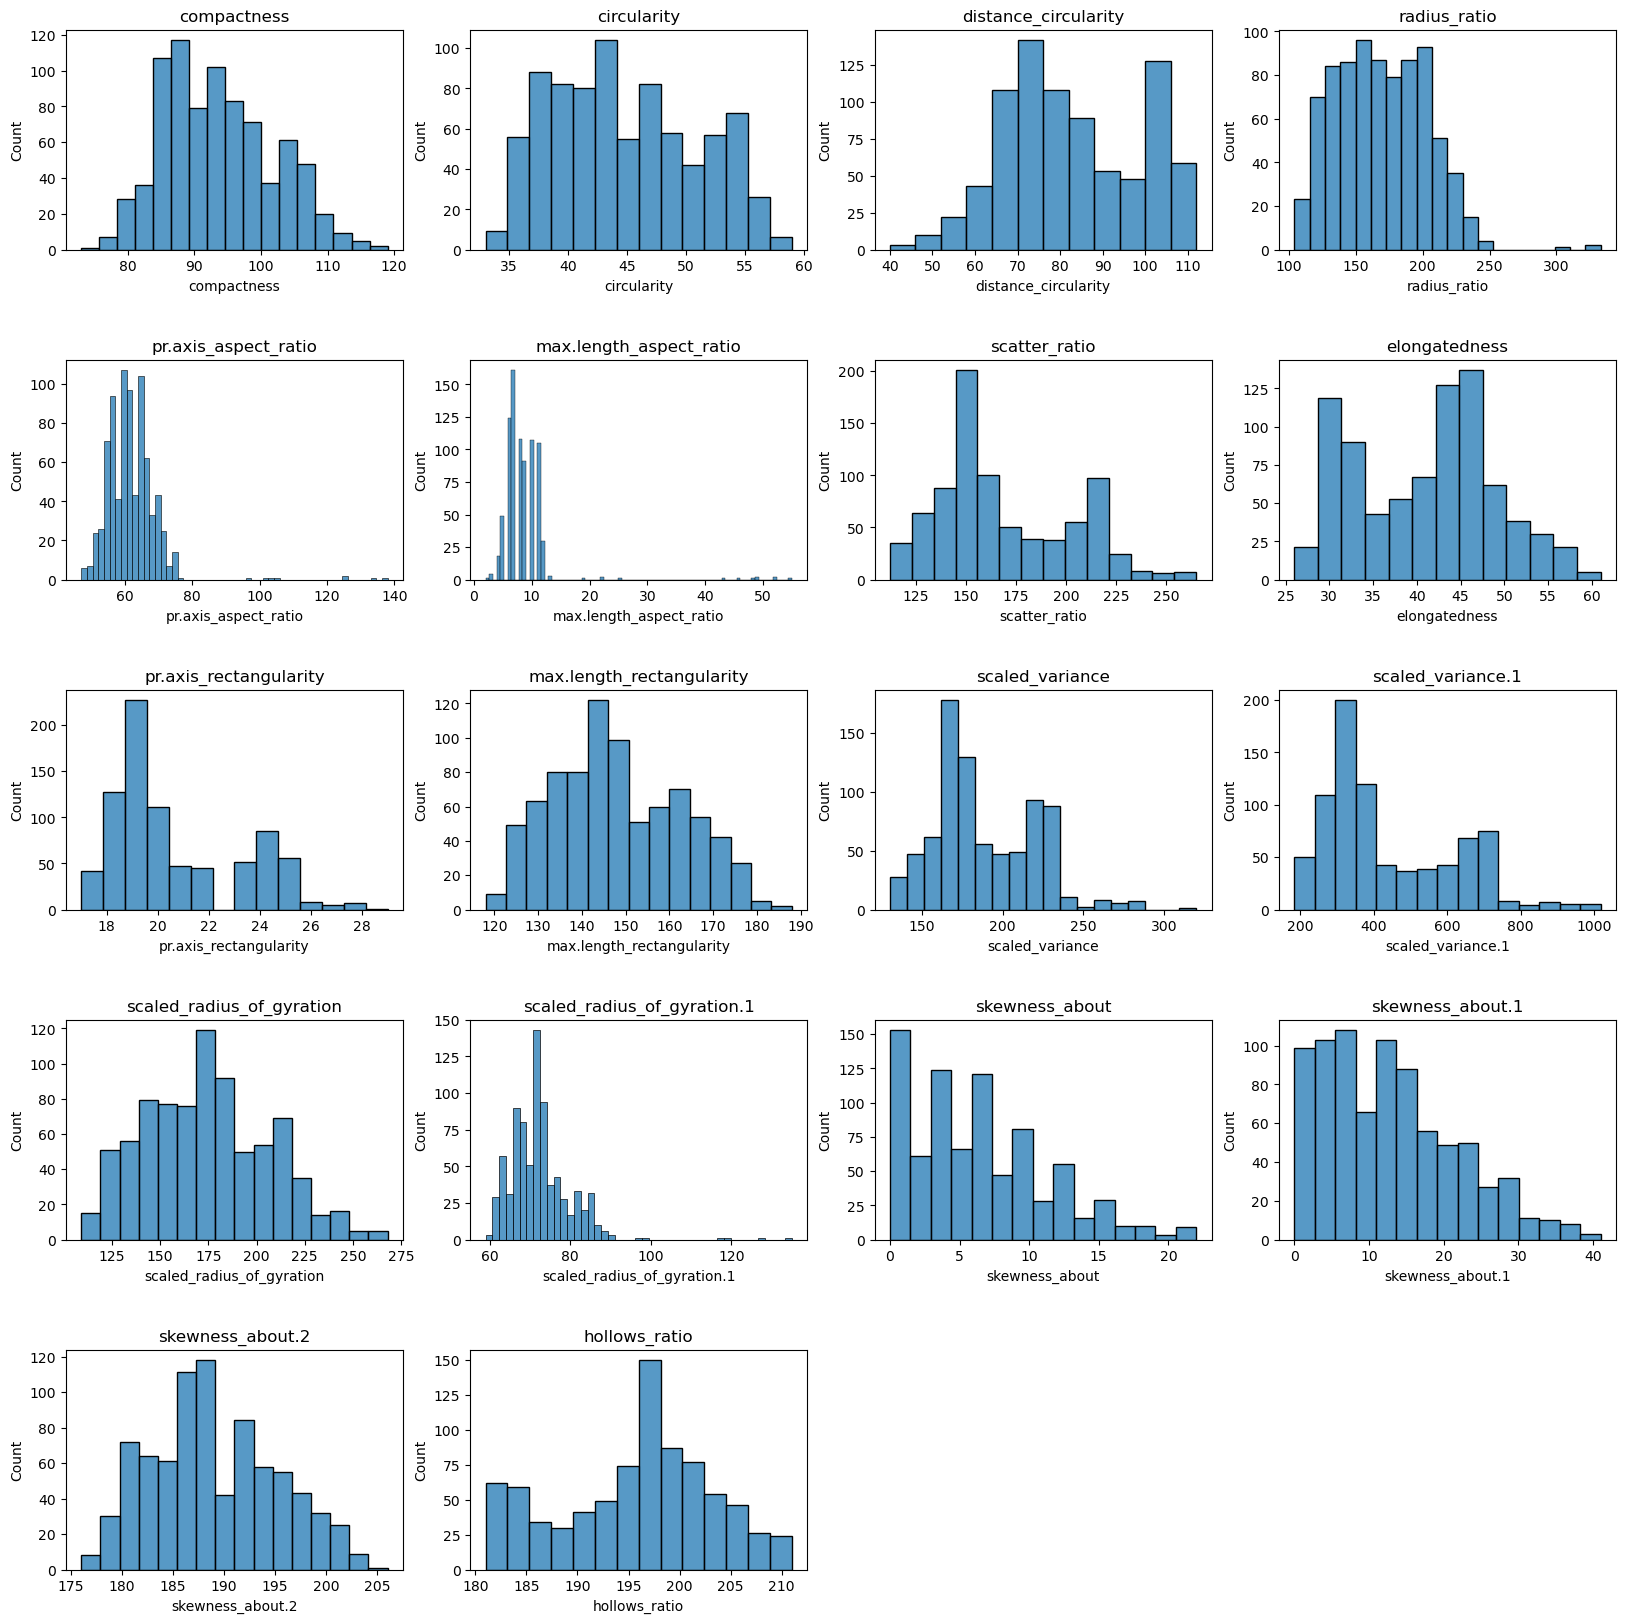

In [20]:
fig = plt.figure(figsize=(20, 20))

for i, col in enumerate(df.columns):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col])
    plt.title(col)

plt.subplots_adjust(hspace=0.5)
plt.show()

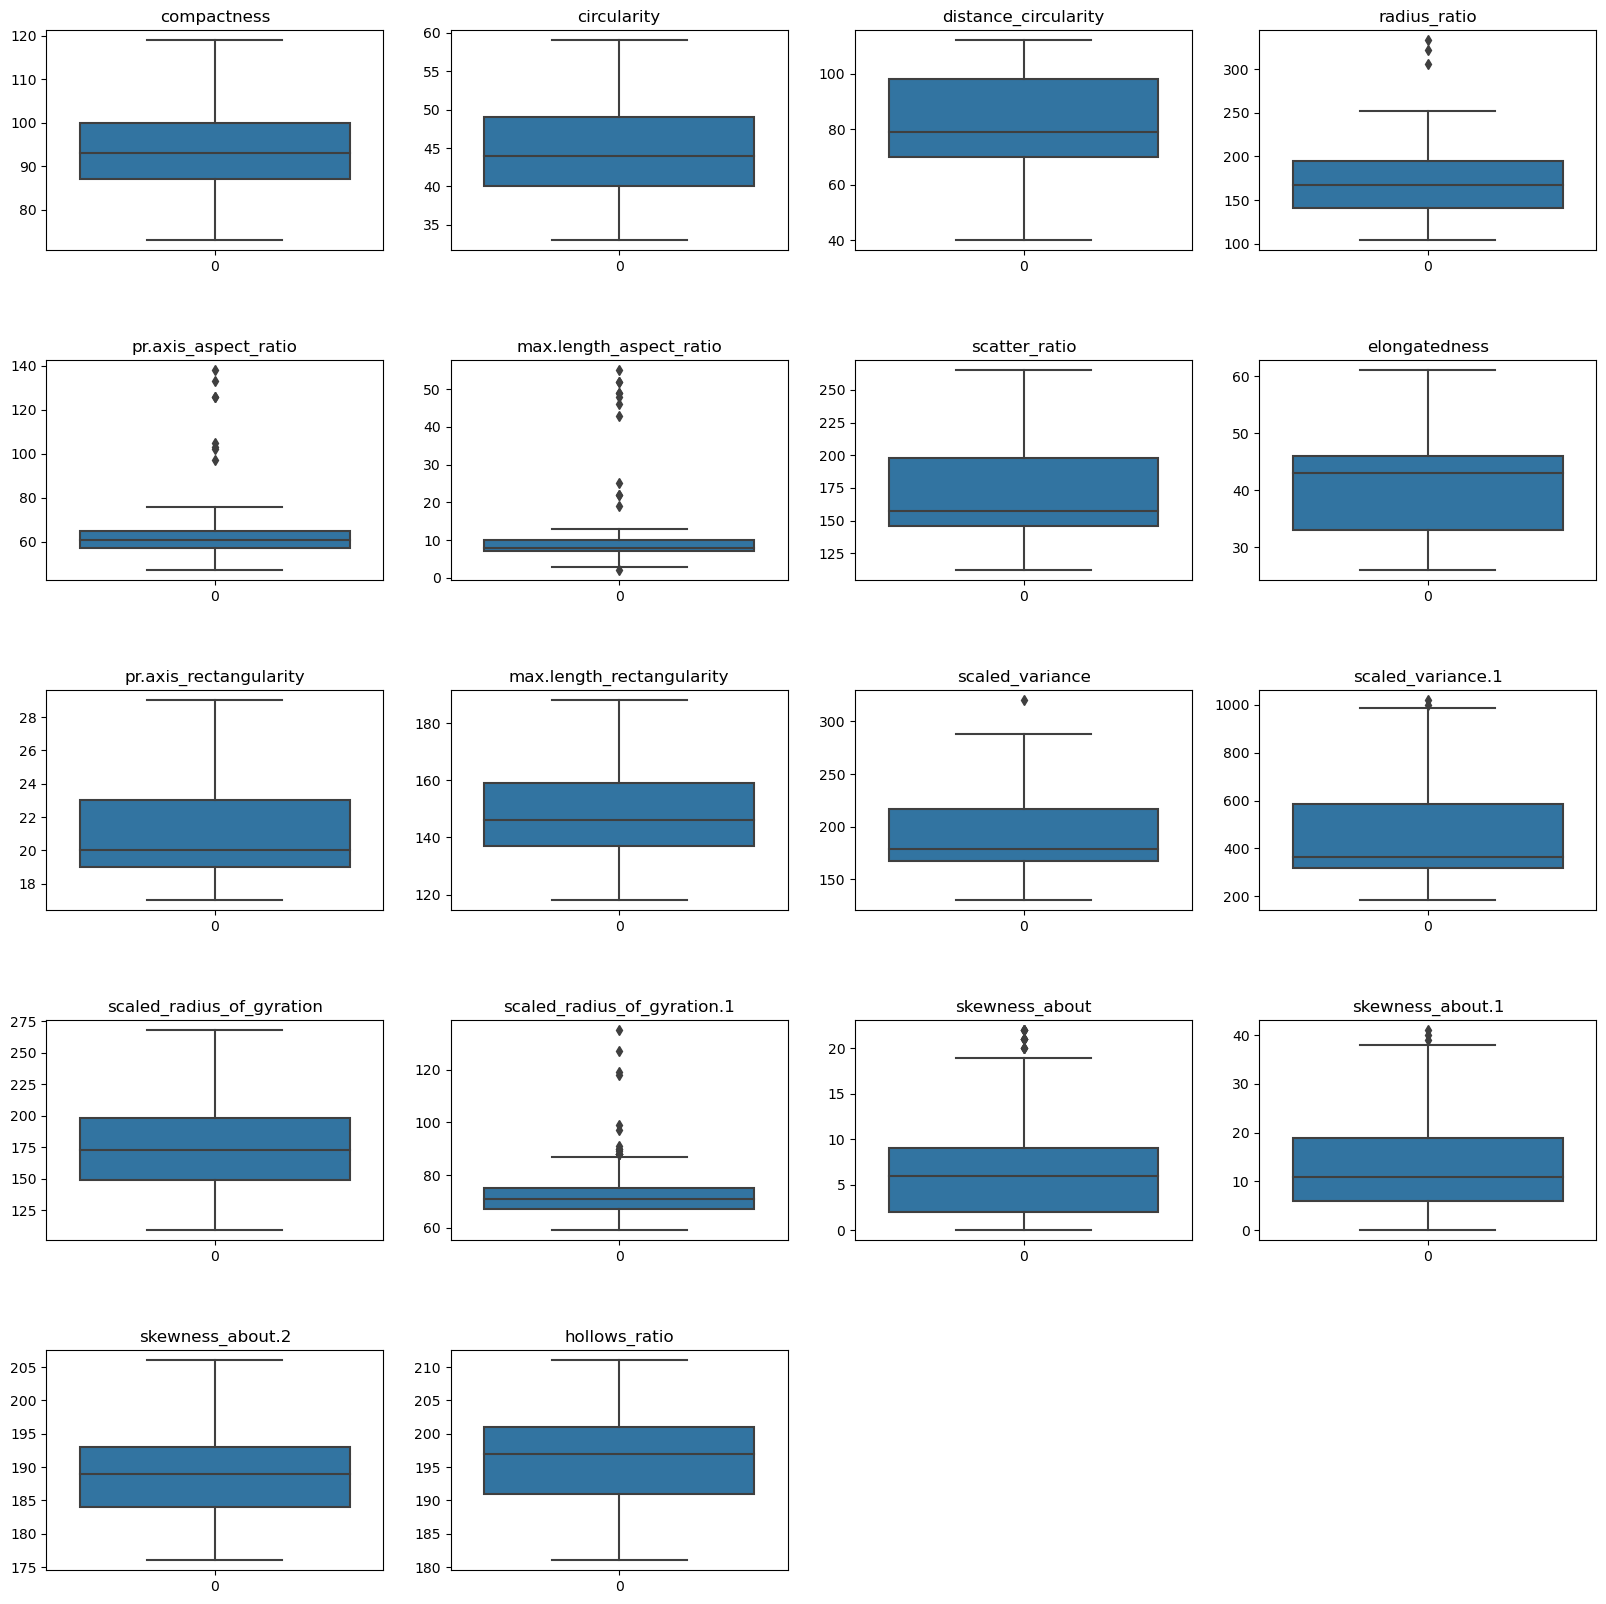

In [21]:
fig = plt.figure(figsize=(20, 20))

for i, col in enumerate(df.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(df[col])
    plt.title(col)

plt.subplots_adjust(hspace=0.5)
plt.show()

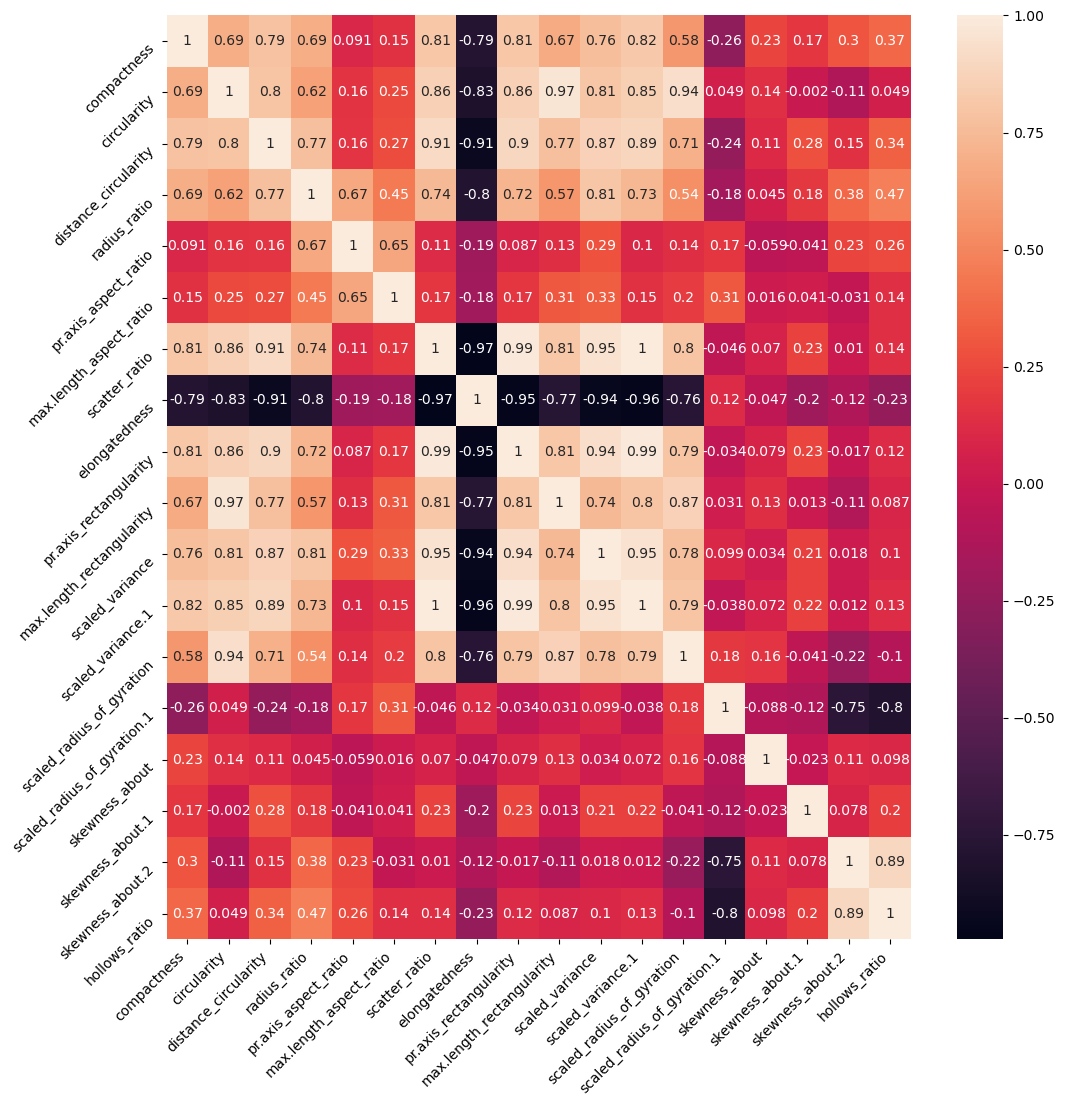

In [22]:
fig = plt.figure(figsize=(12, 12))

correlation = df.corr()

# plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cbar=True)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, va="top")

plt.show()